In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()

from sklearn.linear_model import LinearRegression
import statsmodels.formula.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

%matplotlib inline

In [5]:
bp_data = pd.read_csv(r"D:/Desktop/supervised learning/datasets/bloodpress.txt", sep="\t", dtype = "float64")
bp_data.drop('Pt', axis=1, inplace=True)

In [6]:
bp_data.head()

,BP,Age,Weight,BSA,Dur,Pulse,Stress
0,105.0,47.0,85.4,1.75,5.1,63.0,33.0
1,115.0,49.0,94.2,2.10,3.8,70.0,14.0
2,116.0,49.0,95.3,1.98,8.2,72.0,10.0
3,117.0,50.0,94.7,2.01,5.8,73.0,99.0
4,112.0,51.0,89.4,1.89,7.0,72.0,95.0


In [7]:
bp_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 7 columns):
BP        20 non-null float64
Age       20 non-null float64
Weight    20 non-null float64
BSA       20 non-null float64
Dur       20 non-null float64
Pulse     20 non-null float64
Stress    20 non-null float64
dtypes: float64(7)
memory usage: 1.2 KB


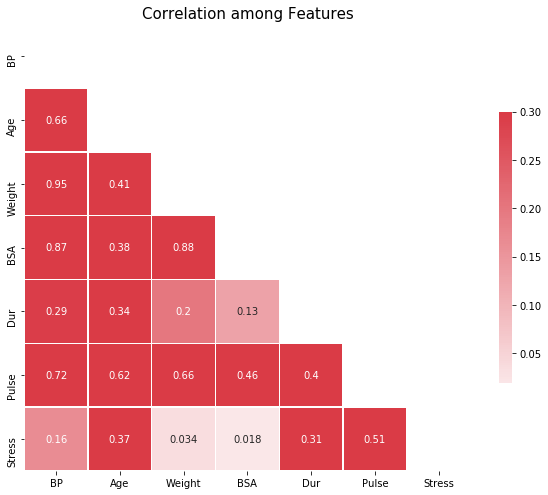

In [8]:
correlation = bp_data.corr()

mask= np.zeros_like(correlation, dtype= np.bool)
mask[np.triu_indices_from(mask)]=True

f, ax= plt.subplots(figsize=(10,10))

cmap= sns.diverging_palette(220, 10, as_cmap=True)

sns.heatmap(correlation, mask=mask, cmap=cmap, vmax=.3, center=0, 
           square=True, linewidths=0.5, cbar_kws={"shrink":0.5}, annot=True)
plt.title("Correlation among Features", fontsize =15)
plt.show()

In [9]:
bp_data.shape

(20, 7)

In [11]:
X=bp_data.iloc[:,:1]
Y = bp_data.iloc[:,0]

In [22]:
def vif_cal(input_data, dependent_col):
    x_var = input_data.drop([dependent_col], axis=1)
    xvar_names = x_var.columns
    for i in range(0, xvar_names.shape[0]):
        y = x_var[xvar_names[i]]
        x = x_var[xvar_names.drop(xvar_names[i])]
        rsq= sm.ols(formula="y~x", data= x_var).fit().rsquared
        vif = round(1/(1-rsq), 2)
        print(xvar_names[1], "VIF: ", vif)

In [23]:
lr1 = LinearRegression()
lr1.fit(bp_data[["Age"]+ ["Weight"]+ ["BSA"]+ ["Dur"]+ ["Pulse"]+["Stress"]], bp_data[["BP"]])
predictions1 = lr1.predict(bp_data[["Age"]+ ["Weight"]+ ["BSA"]+ ["Dur"]+ ["Pulse"]+["Stress"]])
model1 = sm.ols(formula= "BP ~ Age+Weight+BSA+Dur+Pulse+Stress", data= bp_data)
fitted1 = model1.fit()
fitted1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     BP   R-squared:                       0.996
Model:                            OLS   Adj. R-squared:                  0.994
Method:                 Least Squares   F-statistic:                     560.6
Date:                Sun, 22 Sep 2019   Prob (F-statistic):           6.40e-15
Time:                        15:00:23   Log-Likelihood:                -6.1033
No. Observations:                  20   AIC:                             26.21
Df Residuals:                      13   BIC:                             33.18
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -12.8705      2.557     -5.034      0.000     -18.394      -7.347
Age            0.7033      0.050     14.177      0.000       0.596       0.810
Weight         0.9699      0.063     15.369      0.000       0.834       1.106
BSA            3.7765      1.580      2.390      0.033       0.363       7.190
Dur            0.0684      0.048      1.412      0.182      -0.036       0.173
Pulse         -0.0845      0.052     -1.637      0.126      -0.196       0.027
Stress         0.0056      0.003      1.633      0.126      -0.002       0.013
==============================================================================
Omnibus:                        7.219   Durbin-Watson:                   2.249
Prob(Omnibus):                  0.027   Jarque-Bera (JB):                4.643
Skew:                          -1.050   Prob(JB):                       0.0981
Kurtosis:                       4.076   Cond. No.                     4.02e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.02e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [24]:
vif_cal(bp_data, dependent_col= "BP")

Weight VIF:  1.76
Weight VIF:  8.42
Weight VIF:  5.33
Weight VIF:  1.24
Weight VIF:  4.41
Weight VIF:  1.83


In [25]:
vif_cal(bp_data.drop(['BSA', 'Pulse'], axis=1), dependent_col= "BP")

Weight VIF:  1.47
Weight VIF:  1.23
Weight VIF:  1.2
Weight VIF:  1.24


In [26]:
lr2 = LinearRegression()
lr2.fit(bp_data[["Age"]+ ["Weight"]+ ["Dur"]+ ["Stress"]], bp_data[["BP"]])
predictions2 = lr2.predict(bp_data[["Age"]+ ["Weight"]+ ["Dur"]+["Stress"]])
model2 = sm.ols(formula= "BP ~ Age+Weight+BSA+Dur+Pulse+Stress", data= bp_data)
fitted2 = model2.fit()
fitted2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     BP   R-squared:                       0.996
Model:                            OLS   Adj. R-squared:                  0.994
Method:                 Least Squares   F-statistic:                     560.6
Date:                Sun, 22 Sep 2019   Prob (F-statistic):           6.40e-15
Time:                        15:04:44   Log-Likelihood:                -6.1033
No. Observations:                  20   AIC:                             26.21
Df Residuals:                      13   BIC:                             33.18
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -12.8705      2.557     -5.034      0.000     -18.394      -7.347
Age            0.7033      0.050     14.177      0.000       0.596       0.810
Weight         0.9699      0.063     15.369      0.000       0.834       1.106
BSA            3.7765      1.580      2.390      0.033       0.363       7.190
Dur            0.0684      0.048      1.412      0.182      -0.036       0.173
Pulse         -0.0845      0.052     -1.637      0.126      -0.196       0.027
Stress         0.0056      0.003      1.633      0.126      -0.002       0.013
==============================================================================
Omnibus:                        7.219   Durbin-Watson:                   2.249
Prob(Omnibus):                  0.027   Jarque-Bera (JB):                4.643
Skew:                          -1.050   Prob(JB):                       0.0981
Kurtosis:                       4.076   Cond. No.                     4.02e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.02e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

C:\Users\bhave\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


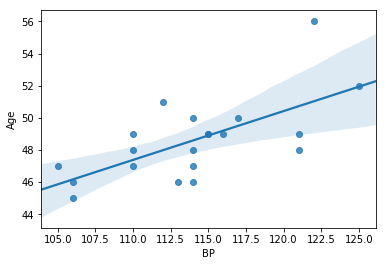

In [27]:
sns.regplot(x= "BP", y= "Age", data = bp_data)

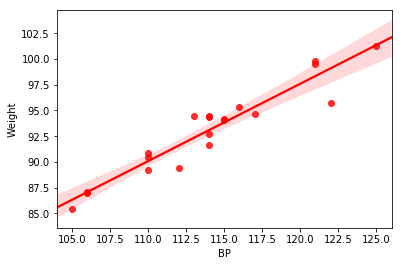

In [28]:
sns.regplot(x= "BP", y= "Weight", data = bp_data, color= 'r')

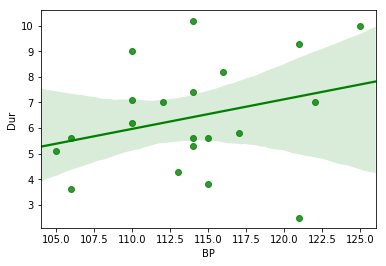

In [29]:
sns.regplot(x= "BP", y= "Dur", data = bp_data, color= 'g')